In [0]:
sc

Out[1]:

SparkContext 

 Spark UI 

 
 Version 
 v3.1.0 
 Master 
 local[8] 
 AppName 
 Databricks Shell

In [0]:
%fs ls

path,name,size
dbfs:/FileStore/,FileStore/,0
dbfs:/Filestore/,Filestore/,0
dbfs:/_spark_metadata/,_spark_metadata/,0
dbfs:/collection.json,collection.json,20220
dbfs:/commits/,commits/,0
dbfs:/databricks-datasets/,databricks-datasets/,0
dbfs:/databricks-results/,databricks-results/,0
dbfs:/metadata,metadata,45
dbfs:/my-file.txt,my-file.txt,19
dbfs:/offsets/,offsets/,0


In [0]:
%ls -la

total 832
drwxr-xr-x 1 root root 4096 Feb 9 12:00 ./
drwxr-xr-x 1 root root 4096 Feb 9 11:48 ../
drwxr-xr-x 2 root root 4096 Jan 1 1970 conf/
-rw-r--r-- 1 root root 739 Feb 9 11:49 derby.log
drwxr-xr-x 3 root root 4096 Feb 9 11:48 eventlogs/
drwxr-xr-x 2 root root 4096 Feb 9 12:15 ganglia/
drwxr-xr-x 2 root root 4096 Feb 9 12:02 logs/
drwxr-xr-x 5 root root 4096 Feb 9 11:49 metastore_db/
-r-xr-xr-x 1 root root 813069 Jan 1 1970 preload_class.lst*

In [0]:
df_wine = spark.read.option("delimiter", ";").option("inferSchema", "true").option("header", "true").csv("/databricks-datasets/wine-quality")
df_wine.head(5)


Out[5]: [Row(fixed acidity='7', volatile acidity=0.27, citric acid=0.36, residual sugar=20.7, chlorides=0.045, free sulfur dioxide=45.0, total sulfur dioxide=170.0, density=1.001, pH=3.0, sulphates=0.45, alcohol=8.8, quality=6),
 Row(fixed acidity='6.3', volatile acidity=0.3, citric acid=0.34, residual sugar=1.6, chlorides=0.049, free sulfur dioxide=14.0, total sulfur dioxide=132.0, density=0.994, pH=3.3, sulphates=0.49, alcohol=9.5, quality=6),
 Row(fixed acidity='8.1', volatile acidity=0.28, citric acid=0.4, residual sugar=6.9, chlorides=0.05, free sulfur dioxide=30.0, total sulfur dioxide=97.0, density=0.9951, pH=3.26, sulphates=0.44, alcohol=10.1, quality=6),
 Row(fixed acidity='7.2', volatile acidity=0.23, citric acid=0.32, residual sugar=8.5, chlorides=0.058, free sulfur dioxide=47.0, total sulfur dioxide=186.0, density=0.9956, pH=3.19, sulphates=0.4, alcohol=9.9, quality=6),
 Row(fixed acidity='7.2', volatile acidity=0.23, citric acid=0.32, residual sugar=8.5, chlorides=0.058, free sulfur dioxide=47.0, total sulfur dioxide=186.0, density=0.9956, pH=3.19, sulphates=0.4, alcohol=9.9, quality=6)]

In [0]:
%time

CPU times: user 5 µs, sys: 1e+03 ns, total: 6 µs
Wall time: 10.3 µs

In [0]:
path = "/databricks-datasets/amazon/data20K/part-*.gz.parquet"
df = spark.read.parquet(path)
df.head()

Row(rating=4.0, review="Worked as expected.I'm not sure what else you expect me to say. I expected no less.Dunno what else to say.")

In [0]:
#display(df)

In [0]:
df.schema

StructType(List(StructField(rating,DoubleType,true),StructField(review,StringType,true)))

In [0]:
df = spark.read.load(format="parquet", path=path)

In [0]:
path_adult = "/databricks-datasets/adult/adult.data"
df_adult = spark.read.csv(path_adult)
#display(df_adult)
#wczytywanie csv

In [0]:
# Ćwiczenie: czytam JSON, Załaduj zbiór IOT ze ścieżki /databricks-datasets/iot/iot_devices.json i podejrzyj go, korzystając z display.

In [0]:
path_adult = "/databricks-datasets/iot/iot_devices.json"
df_jason = spark.read.csv(path_adult)
#display(df_jason)

In [0]:
df_adult = spark.read.csv(path_adult)
df_adult.schema

StructType(List(StructField(_c0,StringType,true),StructField(_c1,StringType,true),StructField(_c2,StringType,true),StructField(_c3,StringType,true),StructField(_c4,StringType,true),StructField(_c5,StringType,true),StructField(_c6,StringType,true),StructField(_c7,StringType,true),StructField(_c8,StringType,true),StructField(_c9,StringType,true),StructField(_c10,StringType,true),StructField(_c11,StringType,true),StructField(_c12,StringType,true),StructField(_c13,StringType,true),StructField(_c14,StringType,true)))

In [0]:
df_adult_with_schema = spark.read.csv(path_adult, inferSchema=True)
df_adult_with_schema.schema

StructType(List(StructField(_c0,StringType,true),StructField(_c1,StringType,true),StructField(_c2,StringType,true),StructField(_c3,StringType,true),StructField(_c4,StringType,true),StructField(_c5,StringType,true),StructField(_c6,StringType,true),StructField(_c7,StringType,true),StructField(_c8,StringType,true),StructField(_c9,StringType,true),StructField(_c10,StringType,true),StructField(_c11,StringType,true),StructField(_c12,StringType,true),StructField(_c13,StringType,true),StructField(_c14,StringType,true)))

In [0]:
spark.read.option("delimiter", ";").csv("/databricks-datasets/adult/adult.data")
#?

DataFrame[_c0: string]

In [0]:
#rdd

In [0]:
rdd = sc.textFile("/databricks-datasets/sample_logs/part-00000")
rdd.take(5)

['3.3.3.3 - user1 [21/Jun/2014:10:00:00 -0700] "GET /endpoint_27 HTTP/1.1" 200 21',
 '4.4.4.4 - user2 [21/Feb/2014:10:00:00 -0300] "GET /endpoint_988 HTTP/1.1" 200 435',
 '3.3.3.3 - user2 [21/Jan/2014:10:00:00 -0200] "GET /endpoint_271 HTTP/1.1" 200 11',
 '4.4.4.4 - user1 [21/Mar/2014:10:00:00 -0400] "POST /endpoint_906 HTTP/1.1" 401 182',
 '3.3.3.3 - - [21/May/2014:10:00:00 -0600] "GET /endpoint_381 HTTP/1.1" 500 208']

In [0]:
import re
def maprow(row):
    match = re.match("([\d.]+).+\"(.+)\"", row)
    if match:
        return match.group(1), match.group(2)
    else:
        return None

rdd_mapped = rdd.map(maprow)
rdd_mapped.take(5)

[('3.3.3.3', 'GET /endpoint_27 HTTP/1.1'),
 ('4.4.4.4', 'GET /endpoint_988 HTTP/1.1'),
 ('3.3.3.3', 'GET /endpoint_271 HTTP/1.1'),
 ('4.4.4.4', 'POST /endpoint_906 HTTP/1.1'),
 ('3.3.3.3', 'GET /endpoint_381 HTTP/1.1')]

In [0]:
#rdd to df

In [0]:
df_logs = rdd_mapped.toDF()
df_logs.head(5)

[Row(_1='3.3.3.3', _2='GET /endpoint_27 HTTP/1.1'),
 Row(_1='4.4.4.4', _2='GET /endpoint_988 HTTP/1.1'),
 Row(_1='3.3.3.3', _2='GET /endpoint_271 HTTP/1.1'),
 Row(_1='4.4.4.4', _2='POST /endpoint_906 HTTP/1.1'),
 Row(_1='3.3.3.3', _2='GET /endpoint_381 HTTP/1.1')]

In [0]:
from pyspark.sql.types import StructType, StructField, StringType

schema = StructType([
    StructField("ip", StringType()),
    StructField("endpoint", StringType())
])

df_logs = rdd_mapped.toDF(schema)
df_logs.head(5)

[Row(ip='3.3.3.3', endpoint='GET /endpoint_27 HTTP/1.1'),
 Row(ip='4.4.4.4', endpoint='GET /endpoint_988 HTTP/1.1'),
 Row(ip='3.3.3.3', endpoint='GET /endpoint_271 HTTP/1.1'),
 Row(ip='4.4.4.4', endpoint='POST /endpoint_906 HTTP/1.1'),
 Row(ip='3.3.3.3', endpoint='GET /endpoint_381 HTTP/1.1')]

In [0]:
# Eksploracja 

In [0]:
path_adult = "/databricks-datasets/adult/adult.data"
df_adult = spark.read.csv(path_adult)
#display(df_adult)

In [0]:
from pyspark.sql.types import StructField, StructType, StringType, IntegerType

fields = [
    StructField("age", IntegerType(), True),
    StructField("workclass", StringType(), True),
    StructField("fnlwgt", IntegerType(), True),
    StructField("education", StringType(), True),
    StructField("education-num", IntegerType(), True),

    StructField("marital-status", StringType(), True),
    StructField("occupation", StringType(), True),
    StructField("relationship", StringType(), True),
    StructField("race", StringType(), True),
    StructField("sex", StringType(), True),

    StructField("capital-gain", IntegerType(), True),
    StructField("capital-loss", IntegerType(), True),
    StructField("hours-per-week", IntegerType(), True),
    StructField("native-country", StringType(), True),
    StructField("label", StringType(), True),
]

schema = StructType(fields)

df_adult = spark.read.csv(path_adult, schema=schema)
#display(df_adult)

In [0]:
fields_str = [
    StructField("age", StringType(), True),
    StructField("workclass", StringType(), True),
    StructField("fnlwgt", StringType(), True),
    StructField("education", StringType(), True),
    StructField("education-num", StringType(), True),

    StructField("marital-status", StringType(), True),
    StructField("occupation", StringType(), True),
    StructField("relationship", StringType(), True),
    StructField("race", StringType(), True),
    StructField("sex", StringType(), True),

    StructField("capital-gain", StringType(), True),
    StructField("capital-loss", StringType(), True),
    StructField("hours-per-week", StringType(), True),
    StructField("native-country", StringType(), True),
    StructField("label", StringType(), True),
]

schema_str = StructType(fields_str)

df_adult = spark.read.csv(path_adult, schema=schema_str)

In [0]:
#display(df_adult)

In [0]:
path_airlines = "/databricks-datasets/airlines/part-00000"
df_airlines = spark.read.csv(path_airlines, header=True, inferSchema=True)
#display(df_airlines)

In [0]:
df_airlines.printSchema()

root
-- Year: integer (nullable = true)
-- Month: integer (nullable = true)
-- DayofMonth: integer (nullable = true)
-- DayOfWeek: integer (nullable = true)
-- DepTime: string (nullable = true)
-- CRSDepTime: integer (nullable = true)
-- ArrTime: string (nullable = true)
-- CRSArrTime: integer (nullable = true)
-- UniqueCarrier: string (nullable = true)
-- FlightNum: integer (nullable = true)
-- TailNum: string (nullable = true)
-- ActualElapsedTime: string (nullable = true)
-- CRSElapsedTime: integer (nullable = true)
-- AirTime: string (nullable = true)
-- ArrDelay: string (nullable = true)
-- DepDelay: string (nullable = true)
-- Origin: string (nullable = true)
-- Dest: string (nullable = true)
-- Distance: string (nullable = true)
-- TaxiIn: string (nullable = true)
-- TaxiOut: string (nullable = true)
-- Cancelled: integer (nullable = true)
-- CancellationCode: string (nullable = true)
-- Diverted: integer (nullable = true)
-- CarrierDelay: string (nullable = true)
-- WeatherDelay: string (nullable = true)
-- NASDelay: string (nullable = true)
-- SecurityDelay: string (nullable = true)
-- LateAircraftDelay: string (nullable = true)
-- IsArrDelayed: string (nullable = true)
-- IsDepDelayed: string (nullable = true)

In [0]:
df_airlines.describe().toPandas()

,summary,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,IsArrDelayed,IsDepDelayed
0,count,645918,645918,645918,645918,645918,645918,645918,645918,645918,...,645918,645918,645918,645918,645918,645918,645918,645918,645918,645918
1,mean,1987.0,10.305453633433347,15.746330029508389,4.010687115082719,1366.9475662971008,1361.3922788960829,1493.2847530686554,1490.8772088717144,None,...,0.00799791924052279,None,0.0021426868426023117,None,None,None,None,None,None,None
2,stddev,0.0,0.4605996523078688,8.834351575622351,1.98161954614337,475.6294888158754,471.119364613607,492.97125484128054,484.8576015018517,None,...,0.08907280624064406,None,0.04623958310655356,None,None,None,None,None,None,None
3,min,1987,10,1,1,1,1,1,1,AA,...,0,NA,0,NA,NA,NA,NA,NA,NO,NO
4,max,1987,11,31,7,NA,2359,NA,2400,WN,...,1,NA,1,NA,NA,NA,NA,NA,YES,YES


In [0]:
df_airlines.describe("DayOfWeek").show()

+-------+-----------------+
summary| DayOfWeek|
+-------+-----------------+
 count| 645918|
 mean|4.010687115082719|
 stddev| 1.98161954614337|
 min| 1|
 max| 7|
+-------+-----------------+

In [0]:
display(df_airlines[["DayOfWeek"]].summary())

summary,DayOfWeek
count,645918
mean,4.010687115082719
stddev,1.98161954614337
min,1
25%,2
50%,4
75%,6
max,7


In [0]:
#Ćwiczenie: describe

#Odczytaj schemat z plików znajdujących się pod ścieżką /databricks-datasets/wine-quality. Dla przykładu możesz wziąć pod uwagę tylko kolor czerwony wina. Zwróć uwagę, że plik rozdzielony jest średnikami, więc będzie potrzeba użycia option przy odczycie CSV. Pamiętaj też o wymuszeniu schematu podczas odczytu i że pierwszą linijką są nazwy kolumn, a nie dane właściwe. Następnie, żeby sprawdzić, jak Ci poszło, użyj head.

In [0]:
df_wine = spark.read.option("delimiter", ";").option("inferSchema", "true").option("header", "true").csv("/databricks-datasets/wine-quality")
df_wine.head(5)

[Row(fixed acidity='7', volatile acidity=0.27, citric acid=0.36, residual sugar=20.7, chlorides=0.045, free sulfur dioxide=45.0, total sulfur dioxide=170.0, density=1.001, pH=3.0, sulphates=0.45, alcohol=8.8, quality=6),
 Row(fixed acidity='6.3', volatile acidity=0.3, citric acid=0.34, residual sugar=1.6, chlorides=0.049, free sulfur dioxide=14.0, total sulfur dioxide=132.0, density=0.994, pH=3.3, sulphates=0.49, alcohol=9.5, quality=6),
 Row(fixed acidity='8.1', volatile acidity=0.28, citric acid=0.4, residual sugar=6.9, chlorides=0.05, free sulfur dioxide=30.0, total sulfur dioxide=97.0, density=0.9951, pH=3.26, sulphates=0.44, alcohol=10.1, quality=6),
 Row(fixed acidity='7.2', volatile acidity=0.23, citric acid=0.32, residual sugar=8.5, chlorides=0.058, free sulfur dioxide=47.0, total sulfur dioxide=186.0, density=0.9956, pH=3.19, sulphates=0.4, alcohol=9.9, quality=6),
 Row(fixed acidity='7.2', volatile acidity=0.23, citric acid=0.32, residual sugar=8.5, chlorides=0.058, free sulfur dioxide=47.0, total sulfur dioxide=186.0, density=0.9956, pH=3.19, sulphates=0.4, alcohol=9.9, quality=6)]

In [0]:
# Transformacja zbioru

In [0]:
df_adult.count() == df_adult.na.drop().count()

True

In [0]:
people = [
    ["John", "Cleese", 30],
    ["Maria", "Cleese", None],
    [None, None, None]
]

df_people = spark.createDataFrame(people)
df_people = df_people.toDF("firstname", "lastname", "age")
display(df_people)

firstname,lastname,age
John,Cleese,30
Maria,Cleese,null
null,null,null


In [0]:
# Ćwiczenie: do RDD

#Żeby nie wyjść z wprawy w posługiwaniu się podstawowymi obiektami, spróbuj teraz przekształcić ten trzyelementowy DF z ludźmi w RDD i policzyć liczbę elementów. Powinna być identyczna!

In [0]:
rdd_from_df = df_people.rdd


In [0]:
rdd_from_df.take(5)

[Row(firstname='John', lastname='Cleese', age=30),
 Row(firstname='Maria', lastname='Cleese', age=None),
 Row(firstname=None, lastname=None, age=None)]

In [0]:
rdd_from_df.countByValue()

defaultdict(int,
 {Row(firstname='John', lastname='Cleese', age=30): 1,
 Row(firstname='Maria', lastname='Cleese', age=None): 1,
 Row(firstname=None, lastname=None, age=None): 1})

In [0]:
df_people.na.drop().collect()

[Row(firstname='John', lastname='Cleese', age=30)]

In [0]:
df_people.na.drop(how='all').collect()

[Row(firstname='John', lastname='Cleese', age=30),
 Row(firstname='Maria', lastname='Cleese', age=None)]

In [0]:
df_people.na.fill("<empty>").collect()

[Row(firstname='John', lastname='Cleese', age=30),
 Row(firstname='Maria', lastname='Cleese', age=None),
 Row(firstname='<empty>', lastname='<empty>', age=None)]

In [0]:
#Ćwiczenie: uzupełniam zerem

#Uzupełnij puste wartości liczbowe w DF wartością 0

df_people.na.fill("0").collect()

[Row(firstname='John', lastname='Cleese', age=30),
 Row(firstname='Maria', lastname='Cleese', age=None),
 Row(firstname='0', lastname='0', age=None)]

In [0]:
people = [
    ["John", "Cleese", 30],
    ["John", "Cleese", 30],
    ["Maria", "Cleese", None],
    [None, None, None]
]

df_people2 = spark.createDataFrame(people).toDF("firstname", "lastname", "age")
df_people2.count()

4

In [0]:
df_people2.drop_duplicates().count()

3

In [0]:
df_people2.drop_duplicates(subset=["lastname"]).collect()

[Row(firstname=None, lastname=None, age=None),
 Row(firstname='John', lastname='Cleese', age=30)]

In [0]:
df_adult.drop_duplicates().count()

32537

In [0]:
#zamiana zbioru na ten bez duplikatów
df_adult = df_adult.drop_duplicates()

In [0]:
# filtrowanie

In [0]:
head_of_adult = df_adult.head(5)
type(head_of_adult)

list

In [0]:
df_adult_limited = df_adult.limit(5)
type(df_adult_limited)
#limit zamiast head - nie zamienia na listę a zostawia typ df

pyspark.sql.dataframe.DataFrame

In [0]:
df_nevermarried = df_adult.filter(
    df_adult["marital-status"] == ' Never-married'
)
# wybór kolumny jak z pandasa

In [0]:
df_nevermarried = df_adult.where(
    df_adult["marital-status"] == ' Never-married'
)
# wybór kolumny alternativ

In [0]:
df_nevermarried = df_adult.filter(
    "`marital-status` == ' Never-married'"
)
# kolumna zawierała w nazwie myślniki backq trzeba dodać

In [0]:
df_nevermarried.count()

10667

In [0]:
df_adult_limited = df_adult.select("age", "label")
# selct wybór kolumny, które się chce zostawić po przetworzeniu
df_adult_limited.head(5)

[Row(age='39', label=' <=50K'),
 Row(age='38', label=' <=50K'),
 Row(age='28', label=' <=50K'),
 Row(age='53', label=' <=50K'),
 Row(age='50', label=' <=50K')]

In [0]:
# Ćwiczenie: kryteria filter

# Metoda select ma zaprogramowany wytrych, który daje Ci możliwość zebrania wszystkich wierszy jednym wyrażeniem. Zastosuj to do zbioru statystyk wina, który już wcześniej obrabialiśmy. Przypominamy, znajduje się pod ścieżką /databricks-datasets/wine-quality. Zwróć DF, w którym są wina, które zawierają wysoką zawartość alkoholu, powiedzmy powyżej 13%. Ile jest takich wpisów?

In [0]:
df_wine = spark.read.option("delimiter", ";").option("inferSchema", "true").option("header", "true").csv("/databricks-datasets/wine-quality")
df_wine.head(5)

[Row(fixed acidity='7', volatile acidity=0.27, citric acid=0.36, residual sugar=20.7, chlorides=0.045, free sulfur dioxide=45.0, total sulfur dioxide=170.0, density=1.001, pH=3.0, sulphates=0.45, alcohol=8.8, quality=6),
 Row(fixed acidity='6.3', volatile acidity=0.3, citric acid=0.34, residual sugar=1.6, chlorides=0.049, free sulfur dioxide=14.0, total sulfur dioxide=132.0, density=0.994, pH=3.3, sulphates=0.49, alcohol=9.5, quality=6),
 Row(fixed acidity='8.1', volatile acidity=0.28, citric acid=0.4, residual sugar=6.9, chlorides=0.05, free sulfur dioxide=30.0, total sulfur dioxide=97.0, density=0.9951, pH=3.26, sulphates=0.44, alcohol=10.1, quality=6),
 Row(fixed acidity='7.2', volatile acidity=0.23, citric acid=0.32, residual sugar=8.5, chlorides=0.058, free sulfur dioxide=47.0, total sulfur dioxide=186.0, density=0.9956, pH=3.19, sulphates=0.4, alcohol=9.9, quality=6),
 Row(fixed acidity='7.2', volatile acidity=0.23, citric acid=0.32, residual sugar=8.5, chlorides=0.058, free sulfur dioxide=47.0, total sulfur dioxide=186.0, density=0.9956, pH=3.19, sulphates=0.4, alcohol=9.9, quality=6)]

In [0]:
type(df_wine)

pyspark.sql.dataframe.DataFrame

In [0]:
# display(df_wine)

In [0]:
df_wine_high = df_wine.filter(
    df_wine["alcohol"] >= '13'
)

In [0]:
#display(df_wine_high)
df_wine.count()

6513

In [0]:
# wstawianie kolumn withColumn i withColumnRenamed

In [0]:
import pyspark.sql.functions as F

df_adult = df_adult.withColumn(
    "label_no",
    F.when(F.trim(F.col("label")) == ">50K", 1).otherwise(0)
)

In [0]:
df_adult.withColumn("ageplusone", df_adult.age+1)

DataFrame[age: string, workclass: string, fnlwgt: string, education: string, education-num: string, marital-status: string, occupation: string, relationship: string, race: string, sex: string, capital-gain: string, capital-loss: string, hours-per-week: string, native-country: string, label: string, label_no: int, ageplusone: double]

In [0]:
#Ćwiczenie: nowa kolumna

#Stwórz nową kolumnę dla zbioru adult, która będzie się nazywać race_lowercase i będzie zawierać — no zgadnij :) — rasę badanego człowieka pisaną małymi znakami. Zadanie dla ambitnych — możesz też przy okazji pozbyć się pustych znaków.

#Tak jak wspomniano, na początku możesz zmienić nazwę kolumny, gdy użyjesz funkcji withColumnRenamed. Pamiętaj, polecenie to nie zmodyfikuje istniejącego DF, raczej stworzy jego kopię wraz ze zmienioną nazwą.

In [0]:
display(df_adult)

age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label,label_no
44,Local-gov,181344,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,38,United-States,>50K,1
20,?,137300,HS-grad,9,Never-married,?,Other-relative,White,Female,0,0,35,United-States,<=50K,0
26,Private,90980,Assoc-voc,11,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,55,United-States,<=50K,0
19,Private,316868,Some-college,10,Never-married,Other-service,Own-child,White,Male,0,0,30,Mexico,<=50K,0
37,Private,635913,Bachelors,13,Never-married,Exec-managerial,Not-in-family,Black,Male,0,0,60,United-States,>50K,1
65,Private,176796,HS-grad,9,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K,0
50,Private,193884,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,Ecuador,<=50K,0
48,Private,102102,Assoc-voc,11,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,50,United-States,>50K,1
34,Local-gov,243867,11th,7,Separated,Machine-op-inspct,Not-in-family,Black,Male,0,0,40,United-States,<=50K,0
42,Private,221172,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K,1


In [0]:
df_adult_race = df_adult.withColumn("race",F.lower(F.col("race")))

In [0]:
display(df_adult_race)

age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label,label_no
44,Local-gov,181344,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,black,Male,0,0,38,United-States,>50K,1
20,?,137300,HS-grad,9,Never-married,?,Other-relative,white,Female,0,0,35,United-States,<=50K,0
26,Private,90980,Assoc-voc,11,Divorced,Adm-clerical,Not-in-family,white,Female,0,0,55,United-States,<=50K,0
19,Private,316868,Some-college,10,Never-married,Other-service,Own-child,white,Male,0,0,30,Mexico,<=50K,0
37,Private,635913,Bachelors,13,Never-married,Exec-managerial,Not-in-family,black,Male,0,0,60,United-States,>50K,1
65,Private,176796,HS-grad,9,Divorced,Adm-clerical,Not-in-family,white,Female,0,0,40,United-States,<=50K,0
50,Private,193884,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,white,Male,0,0,40,Ecuador,<=50K,0
48,Private,102102,Assoc-voc,11,Married-civ-spouse,Tech-support,Husband,white,Male,0,0,50,United-States,>50K,1
34,Local-gov,243867,11th,7,Separated,Machine-op-inspct,Not-in-family,black,Male,0,0,40,United-States,<=50K,0
42,Private,221172,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,white,Male,0,0,40,United-States,>50K,1


In [0]:
df_adult_race_lower = df_adult_race.withColumnRenamed("race", "race_lowercase")

display(df_adult_race_lower)

age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race_lowercase,sex,capital-gain,capital-loss,hours-per-week,native-country,label,label_no
44,Local-gov,181344,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,black,Male,0,0,38,United-States,>50K,1
20,?,137300,HS-grad,9,Never-married,?,Other-relative,white,Female,0,0,35,United-States,<=50K,0
26,Private,90980,Assoc-voc,11,Divorced,Adm-clerical,Not-in-family,white,Female,0,0,55,United-States,<=50K,0
19,Private,316868,Some-college,10,Never-married,Other-service,Own-child,white,Male,0,0,30,Mexico,<=50K,0
37,Private,635913,Bachelors,13,Never-married,Exec-managerial,Not-in-family,black,Male,0,0,60,United-States,>50K,1
65,Private,176796,HS-grad,9,Divorced,Adm-clerical,Not-in-family,white,Female,0,0,40,United-States,<=50K,0
50,Private,193884,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,white,Male,0,0,40,Ecuador,<=50K,0
48,Private,102102,Assoc-voc,11,Married-civ-spouse,Tech-support,Husband,white,Male,0,0,50,United-States,>50K,1
34,Local-gov,243867,11th,7,Separated,Machine-op-inspct,Not-in-family,black,Male,0,0,40,United-States,<=50K,0
42,Private,221172,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,white,Male,0,0,40,United-States,>50K,1


In [0]:
people = [
    ["John", "Cleese", 30],
    ["Maria", "Cleese", None],
    [None, None, None]
]

df_people = spark.createDataFrame(people)
df_people = df_people.toDF("firstname", "lastname", "age")

In [0]:
df_people.withColumnRenamed("lastname", "name")

DataFrame[firstname: string, name: string, age: bigint]

In [0]:
df_people.toDF("first_name", "last_name", "persons_age")

DataFrame[first_name: string, last_name: string, persons_age: bigint]

In [0]:
import pyspark.sql.functions as F
from pyspark.sql.types import IntegerType

def get_label_as_number(label_str):
    trimmed_label = label_str.strip()
    return 1 if trimmed_label == '>50K' else 0

udf_get_label_as_number = F.udf(get_label_as_number, IntegerType())

df_adult = df_adult.withColumn(
    "label_no_udf",
    udf_get_label_as_number("label")
)

df_adult.head()

Row(age='39', workclass=' State-gov', fnlwgt=' 77516', education=' Bachelors', education-num=' 13', marital-status=' Never-married', occupation=' Adm-clerical', relationship=' Not-in-family', race=' White', sex=' Male', capital-gain=' 2174', capital-loss=' 0', hours-per-week=' 40', native-country=' United-States', label=' <=50K', label_no=0, label_no_udf=0)

In [0]:
udf_sex_abbr = F.udf(lambda x: x.strip()[0])
df_adult = df_adult.withColumn("sex_abbr", udf_sex_abbr("sex"))
df_adult.head()

Row(age='39', workclass=' State-gov', fnlwgt=' 77516', education=' Bachelors', education-num=' 13', marital-status=' Never-married', occupation=' Adm-clerical', relationship=' Not-in-family', race=' White', sex=' Male', capital-gain=' 2174', capital-loss=' 0', hours-per-week=' 40', native-country=' United-States', label=' <=50K', label_no=0, label_no_udf=0, sex_abbr='M')

In [0]:
df_adult.groupby('label_no').count().collect()

[Row(label_no=1, count=7839), Row(label_no=0, count=24698)]

In [0]:
df_adult.groupby('label_no').agg(F.count('label')).collect()

[Row(label_no=1, count(label)=7839), Row(label_no=0, count(label)=24698)]

In [0]:
df_adult.count()

32537

In [0]:
df_adult.agg(F.count("age")).collect()

[Row(count(age)=32537)]

In [0]:
df_adult.groupby('label_no').agg(F.min('age')).collect()

[Row(label_no=0, min(age)='17'), Row(label_no=1, min(age)='19')]

In [0]:
df_adult.groupby('label_no').agg(F.variance('age')).collect()

[Row(label_no=1, var_samp(age)=110.67254794523407),
 Row(label_no=0, var_samp(age)=196.48567007218617)]

In [0]:
# Zadanie: szukamy reguł

#W tym zadaniu zainteresujemy się tym, jak młody wiek wpływa na takie cechy jak tygodniowy czas pracy albo stan cywilny (marital-status).

# Możesz posłużyć się tym krótkim fragmentem kodu do stworzenia odpowiedniego DF.


In [0]:
path_adult = "/databricks-datasets/adult/adult.data"

field_names = [
    "age",
    "workclass",
    "fnlwgt",
    "education",
    "education-num",
    "marital-status",
    "occupation",
    "relationship",
    "race",
    "sex",
    "capital-gain",
    "capital-loss",
    "hours-per-week",
    "native-country",
    "label"
]

df_adult = spark.read.csv(path_adult)
df_adult = df_adult.toDF(*field_names)

In [0]:
#Najpierw ze zbioru pozbądź się duplikatów. Potem stwórz w nim nową kolumnę – is young, która będzie zależna od wartości kolumny age.
# Niech wiek 35 będzie granicą młodości, a więc wszystkich poniżej 35 roku życia uznajemy za młodych.

# Będziemy też potrzebować kolumny tłumaczącej czas pracy na kategorie. Załóżmy istnienie dwóch kategorii: fulltime (> 39 godzin), 
#parttime (< 39 godzin).

# Następnie stwórz dwa zbiory: młodych i starszych respondentów. Do tego rozgraniczenia wykorzystaj kolumnę, którą przed chwilą stworzyliśmy.

# Dla tych grup porównaj ilości elementów w grupach wartości czasu pracy i stanu cywilnego. Czy dostrzegasz jakieś reguły? Jeśli potrafisz, stwórz też wykresy słupkowe, które ukazują takie zależności.

In [0]:
df_adult.drop_duplicates().count()

32537

In [0]:
# check
df_adult.count()

32561

In [0]:
import pyspark.sql.functions as F
df_adult = df_adult.withColumn(
    "is young",
    F.when(F.trim(F.col("age")) < "35", "young").otherwise("too_old_to_die_young")
)


In [0]:
# Będziemy też potrzebować kolumny tłumaczącej czas pracy na kategorie. Załóżmy istnienie dwóch kategorii: fulltime (> 39 godzin), 
#parttime (< 39 godzin).

In [0]:
df_adult = df_adult.withColumn(
    "work_time",
    F.when(F.trim(F.col("hours-per-week")) > "39", "fulltime").otherwise("parttime")
)

In [0]:
display(df_adult)

age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label,is young,work_time
39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,too_old_to_die_young,fulltime
50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,too_old_to_die_young,parttime
38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,too_old_to_die_young,fulltime
53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,too_old_to_die_young,fulltime
28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,young,fulltime
37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K,too_old_to_die_young,fulltime
49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K,too_old_to_die_young,parttime
52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K,too_old_to_die_young,fulltime
31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K,young,fulltime
42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K,too_old_to_die_young,fulltime


In [0]:
# Następnie stwórz dwa zbiory: młodych i starszych respondentów. Do tego rozgraniczenia wykorzystaj kolumnę, którą przed chwilą stworzyliśmy.

In [0]:
df_adult.groupby('is young').count().collect()

[Row(is young='young', count=14049),
 Row(is young='too_old_to_die_young', count=18512)]

In [0]:
df_young = df_adult.where(
    df_adult["is young"] == 'young'
)
display(df_young)

age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label,is young,work_time
28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,young,fulltime
31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K,young,fulltime
30,State-gov,141297,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K,young,fulltime
23,Private,122272,Bachelors,13,Never-married,Adm-clerical,Own-child,White,Female,0,0,30,United-States,<=50K,young,parttime
32,Private,205019,Assoc-acdm,12,Never-married,Sales,Not-in-family,Black,Male,0,0,50,United-States,<=50K,young,fulltime
34,Private,245487,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,Amer-Indian-Eskimo,Male,0,0,45,Mexico,<=50K,young,fulltime
25,Self-emp-not-inc,176756,HS-grad,9,Never-married,Farming-fishing,Own-child,White,Male,0,0,35,United-States,<=50K,young,parttime
32,Private,186824,HS-grad,9,Never-married,Machine-op-inspct,Unmarried,White,Male,0,0,40,United-States,<=50K,young,fulltime
19,Private,168294,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K,young,fulltime
23,Local-gov,190709,Assoc-acdm,12,Never-married,Protective-serv,Not-in-family,White,Male,0,0,52,United-States,<=50K,young,fulltime


In [0]:
df_too_old_to_die_young = df_adult.where(
    df_adult["is young"] == 'too_old_to_die_young'
)
display(df_too_old_to_die_young)

age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label,is young,work_time
39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,too_old_to_die_young,fulltime
50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,too_old_to_die_young,parttime
38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,too_old_to_die_young,fulltime
53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,too_old_to_die_young,fulltime
37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K,too_old_to_die_young,fulltime
49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K,too_old_to_die_young,parttime
52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K,too_old_to_die_young,fulltime
42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K,too_old_to_die_young,fulltime
37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K,too_old_to_die_young,fulltime
40,Private,121772,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,?,>50K,too_old_to_die_young,fulltime


In [0]:
# Dla tych grup porównaj ilości elementów w grupach wartości czasu pracy i stanu cywilnego. Czy dostrzegasz jakieś reguły? 
# Jeśli potrafisz, stwórz też wykresy słupkowe, które ukazują takie zależności.


In [0]:
# 1. Czas pracy 

In [0]:
df_young_pandas = df_young.toPandas()
young = df_young_pandas['work_time'].value_counts()
young

fulltime 9963
parttime 4086
Name: work_time, dtype: int64

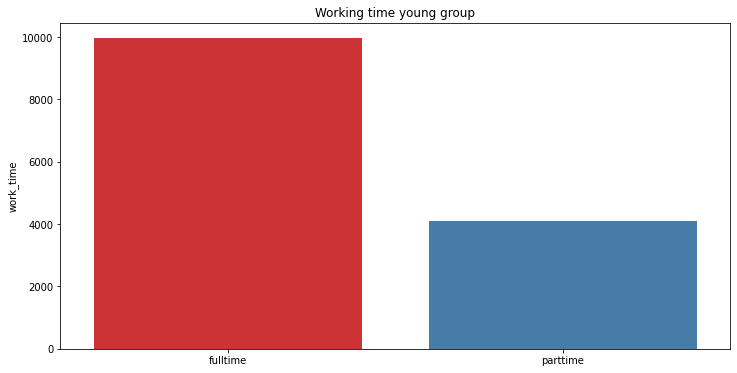

In [0]:
import seaborn as sns
plt.figure(figsize=(12,6))
plt.title ('Working time young group')
sns.barplot(x=young.index, y= young, palette='Set1');

In [0]:
# W grupie młodych ok 14 k pracowników, na pełnym etacie pracowało 9963 co stanpwiło ok 60 % pracowników młodych
# do ok 40 procent 4086 pracowników pracująych na umowach czasowych  

In [0]:
df_olders_pandas = df_too_old_to_die_young.toPandas()
olders = df_olders_pandas['work_time'].value_counts()
olders

fulltime 15202
parttime 3310
Name: work_time, dtype: int64

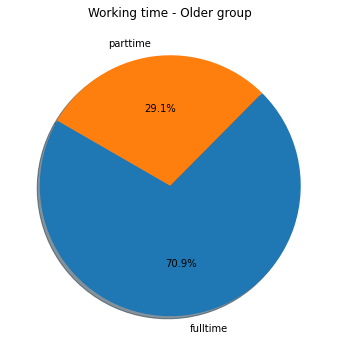

In [0]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.title ('Working time - Older group')
plt.pie(plec,labels= olders.index, autopct='%1.1f%%',startangle=150,shadow=True);

In [0]:
# W grupie liczniejszej starszych ok 18 500 pracowników, na pełnym etacie pracowało 15202 co stanpwiło ok 70 % pracowników starszych
# do ok 30 procent 3310 pracowników pracująych na umowach czasowych.  

In [0]:
# Graupa starszych pracowników była liczniejsza oraz częściej pracowała na pełnym etacie. ok 30 do 40 % w grupach

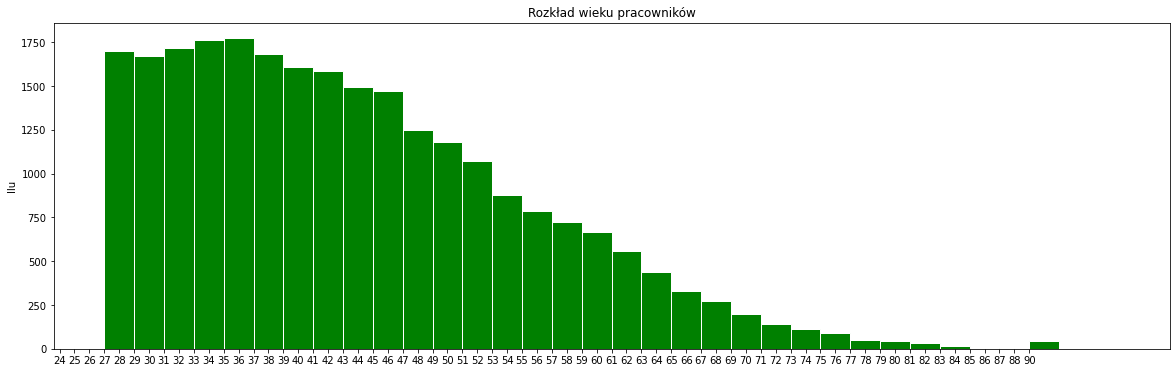

In [0]:
df_adults_pandas = df_adult.toPandas()
df3 = df_adults_pandas.sort_values(by='age',ascending=True)  
plt.figure(figsize=(20,6))
plt.title ('Rozkład wieku pracowników')
plt.ylabel('Ilu')
plt.hist(df3.age, bins = np.arange(10,80,2), color='green', edgecolor = 'white');


In [0]:
#2. Status

In [0]:
status_young = df_young_pandas['marital-status'].value_counts()
status_young

Never-married 8536
 Married-civ-spouse 3975
 Divorced 970
 Separated 373
 Married-spouse-absent 150
 Widowed 29
 Married-AF-spouse 16
Name: marital-status, dtype: int64

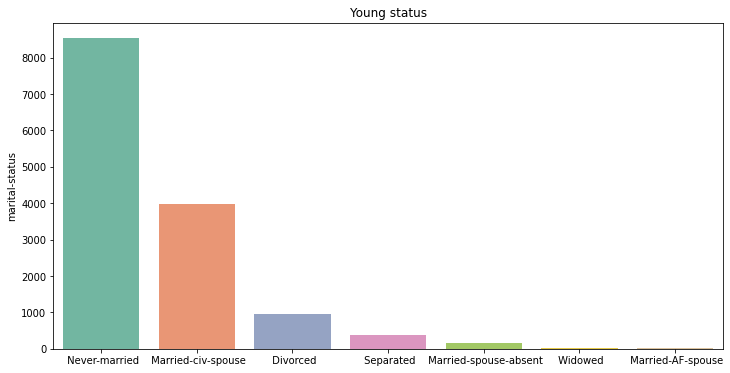

In [0]:
plt.figure(figsize=(12,6))
plt.title ('Young status')
sns.barplot(x=status.index, y= status, palette='Set2');

In [0]:
status_older = df_olders_pandas['marital-status'].value_counts()
status_older

Married-civ-spouse 11001
 Divorced 3473
 Never-married 2147
 Widowed 964
 Separated 652
 Married-spouse-absent 268
 Married-AF-spouse 7
Name: marital-status, dtype: int64

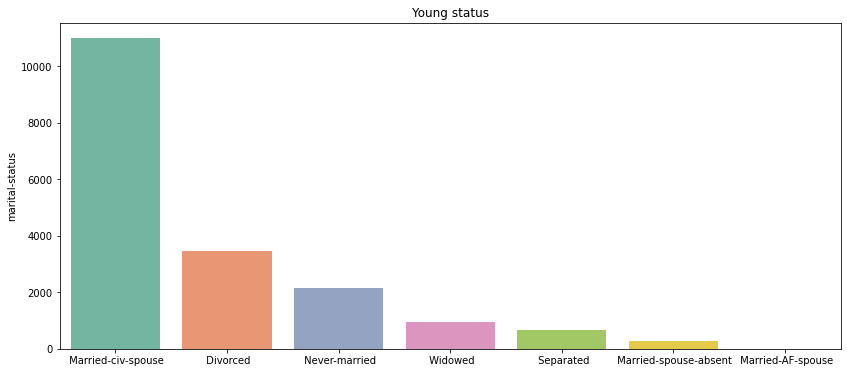

In [0]:
plt.figure(figsize=(14,6))
plt.title ('Olders status')
sns.barplot(x=status_older.index, y= status_older, palette='Set2');

In [0]:
# W grupie młodszej dominowali single w przeciwieństwie do grupy starszych gdzie większość osób była w związku. Grupa singli dominująca wsród młodych stała się grupą niszową z wiekiem.  